In [8]:
! head -4 spb/data/result.csv

In [9]:
! wc -l spb/data/result.csv

14121834 spb/data/result.csv


In [ ]:
# минимальное среднее максимальная цена, (МНФ 1, 2, 3) - действующее средство
# прототип прогнозирования нехватка или избытка
# прогнозирование дефицита поставок
# Горизонт событий
# Запасы и продажи

In [10]:
import pandas as pd
df = pd.read_csv('spb/data/result.csv', sep='#')
df

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: DtypeWarning: Columns (0,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,year_,month_,prod_norm_name,prod_form_norm_name,prod_d_norm_name,prod_pack_1_2,prod_pack_1_size,ЖНВЛП,Ковид,origin,code,name,max_3,min_3,avg_3,Count_3
0,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,Нет,Нет,2.0,2.0,Республика Башкортостан,31650.0,31650.0,31650.0,3.0
1,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,Нет,Нет,2.0,14.0,Республика Саха (Якутия),NaN,NaN,NaN,NaN
2,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,Нет,Нет,2.0,15.0,Республика Северная Осетия - Алания,NaN,NaN,NaN,NaN
3,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,Нет,Нет,2.0,18.0,Удмуртская Республика,NaN,NaN,NaN,NaN
4,2021,1.0,МНН №281,СИРОП,НЕ УКАЗАНО,1,150.0,Нет,Нет,2.0,20.0,Чеченская Республика,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14121826,2021,9.0,МНН №222,ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ,250 мг,6.0,10.0,Нет,Нет,2.0,43.0,Кировская область,NaN,NaN,NaN,NaN
14121827,2021,9.0,МНН №222,ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ,250 мг,6.0,10.0,Нет,Нет,2.0,56.0,Оренбургская область,NaN,NaN,NaN,NaN
14121828,2021,9.0,МНН №222,ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ,250 мг,6.0,10.0,Нет,Нет,2.0,59.0,Пермский край,NaN,NaN,NaN,NaN
14121829,2021,9.0,МНН №222,ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ,250 мг,6.0,10.0,Нет,Нет,2.0,71.0,Тульская область,NaN,NaN,NaN,NaN


In [12]:
df.describe()

,month_,prod_pack_1_size,origin,code,max_3,min_3,avg_3,Count_3
count,1.412183e+07,1.412183e+07,1.412183e+07,1.412183e+07,1.965257e+06,1.965257e+06,1.965257e+06,1.965257e+06
mean,5.500055e+00,5.315636e+03,1.344470e+00,4.338829e+01,7.293310e+04,5.372466e+04,6.151468e+04,2.854663e+03
std,2.872307e+00,2.755634e+05,4.751952e-01,2.520113e+01,1.672269e+06,1.670914e+06,1.671319e+06,4.841025e+04
min,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,3.000000e+00,7.000000e+00,1.000000e+00,2.200000e+01,1.600000e+04,9.281000e+03,1.241800e+04,1.000000e+01
50%,6.000000e+00,1.000000e+01,1.000000e+00,4.300000e+01,3.650000e+04,2.240950e+04,2.888000e+04,4.800000e+01
75%,8.000000e+00,3.000000e+01,2.000000e+00,6.400000e+01,7.168800e+04,4.795000e+04,5.771000e+04,2.920000e+02
max,1.000000e+01,3.360000e+07,2.000000e+00,9.200000e+01,5.652560e+08,5.652560e+08,5.652560e+08,1.904270e+07


In [13]:
regions = df['name'].unique()
print(len(regions))
print(regions)

86
['Республика Башкортостан' 'Республика Саха (Якутия)'
 'Республика Северная Осетия - Алания' 'Удмуртская Республика'
 'Чеченская Республика' 'Брянская область' 'Ленинградская область'
 'Новосибирская область' 'Омская область' 'Пензенская область'
 'Ульяновская область' 'Республика Крым' 'Красноярский край'
 'Приморский край' 'Амурская область' 'Калужская область'
 'Кемеровская область' 'Ростовская область' 'Челябинская область'
 'Забайкальский край' 'Санкт-Петербург' 'Республика Коми'
 'Краснодарский край' 'Астраханская область' 'Самарская область'
 'Томская область' 'Ненецкий автономный округ' 'Республика Дагестан'
 'Республика Татарстан (Татарстан)' 'Республика Тыва' 'Республика Хакасия'
 'Чувашская Республика - Чувашия' 'Волгоградская область'
 'Вологодская область' 'Магаданская область' 'Мурманская область'
 'Саратовская область' 'Тамбовская область' 'Республика Адыгея (Адыгея)'
 'Белгородская область' 'Костромская область' 'Курганская область'
 'Липецкая область' 'Московская об

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14121831 entries, 0 to 14121830
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   year_                object 
 1   month_               float64
 2   prod_norm_name       object 
 3   prod_form_norm_name  object 
 4   prod_d_norm_name     object 
 5   prod_pack_1_2        object 
 6   prod_pack_1_size     float64
 7   ЖНВЛП                object 
 8   Ковид                object 
 9   origin               float64
 10  code                 float64
 11  name                 object 
 12  max_3                float64
 13  min_3                float64
 14  avg_3                float64
 15  Count_3              float64
dtypes: float64(8), object(8)
memory usage: 1.7+ GB


In [17]:
df = pd.read_excel('spb/data_2/Январь 21.xlsx', engine='openpyxl')
df

,Месяц,МНН,Нормализованное наименование формы выпуска ЛП,Нормализованное наименование дозировки ЛП,Количество первичной в потребительской упаковке,Масса/объем в первичной уп-ке,ЖНЛП,Ковид,Происхождение,Код субъекта РФ,Наименование субъекта РФ,Количество хранимой продукции (шт)
0,1,МНН №1,МАЗЬ НАЗАЛЬНАЯ,0.25 %,1,10.0,0,0,Отечественное,33,Владимирская область,2737
1,1,МНН №4,МАЗЬ ДЛЯ НАРУЖНОГО ПРИМЕНЕНИЯ,1 %,1,10.0,1,1,Отечественное,60,Псковская область,14
2,1,МНН №38,ГЕЛЬ ДЛЯ НАРУЖНОГО ПРИМЕНЕНИЯ,5 %,1,40.0,0,0,Иностранное,2,Республика Башкортостан,389
3,1,МНН №38,ГЕЛЬ ДЛЯ НАРУЖНОГО ПРИМЕНЕНИЯ,2.5 %,1,40.0,0,0,Иностранное,71,Тульская область,54
4,1,МНН №46,РЕЗИНКИ ЖЕВАТЕЛЬНЫЕ,4 мг,2,15.0,0,0,Иностранное,53,Новгородская область,417
...,...,...,...,...,...,...,...,...,...,...,...,...
287938,1,МНН №1189,РАСТВОР ДЛЯ ИНЪЕКЦИЙ,1 мг/мл,5,1.0,1,0,Отечественное,56,Оренбургская область,1
287939,1,МНН №334,ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ,100 мг,1,20.0,0,0,Отечественное,9,Карачаево-Черкесская республика,1
287940,1,МНН №299,ТАБЛЕТКИ ПОКРЫТЫЕ ПЛЕНОЧНОЙ ОБОЛОЧКОЙ,50 мг,3,4.0,0,0,Иностранное,32,Брянская область,1
287941,1,МНН №408,ТАБЛЕТКИ ДИСПЕРГИРУЕМЫЕ,200 мг,2,10.0,0,0,Отечественное,17,Республика Тыва,1


<AxesSubplot:xlabel='Наименование субъекта РФ'>

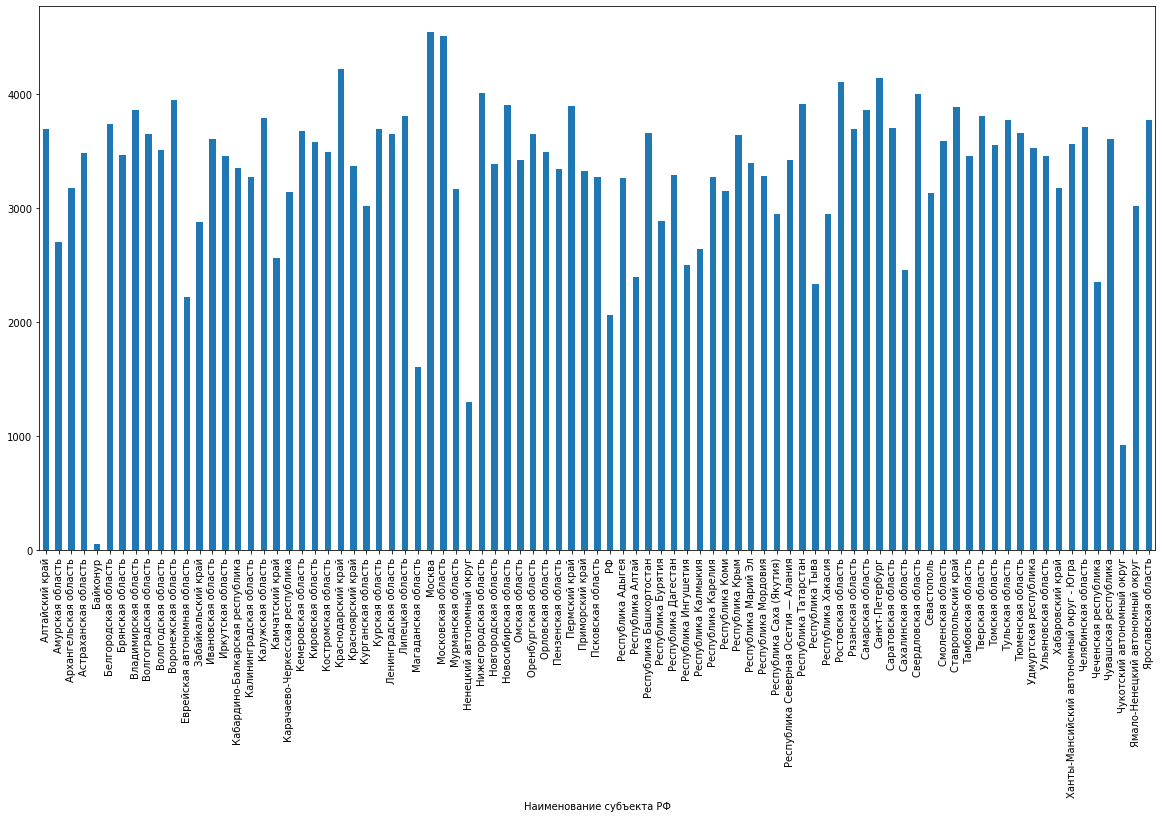

In [23]:
%matplotlib inline
df.groupby('Наименование субъекта РФ').count()['Месяц'].plot(kind='bar', figsize=(20, 10))